In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from imageio import imread
import sys

sys.path.insert(0, "../src/")
sys.path.insert(0, "../../project_1/src")
from NeuralNetwork import *
from CostFunctions import *
from ActivationFunctions import *
from SGD import *
from sklearn.model_selection import train_test_split
from FrankeFunction import *
from linear_regression import *
from stat_tools import *

In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print("X shape = ", X.shape)
print("y shape = ", y.shape)

# Rescale the X data from [0, 255] -> [0, 1]
# NOTE: Re-Scaling brought the score from ~93 -> ~96 for a 30 layer ReLU
X /= 255.0
np.max(X)

X shape =  (70000, 784)
y shape =  (70000,)


1.0

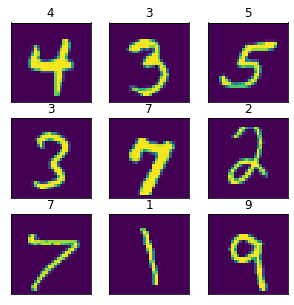

In [3]:
plt.figure(figsize = (5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    pick = np.random.randint(len(X)-1)
    plt.imshow(X[pick].reshape(28, 28))
    plt.title(f"{y[pick]}")
    plt.xticks([]); plt.yticks([])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)

(56000, 784)
(56000,)


In [5]:
# Preprocess Y for our NN
y_train_onehot = np.zeros([len(y_train), 10])
y_test_onehot = np.zeros([len(y_test), 10])

for i, num in enumerate(y_train):
    y_train_onehot[i, int(num)] = 1
    
for i, num in enumerate(y_test):
    y_test_onehot[i, int(num)] = 1    

In [6]:
y_test_onehot.shape

(14000, 10)

In [7]:
FFNN = FeedForwardNeuralNetwork(
    X=X_train,
    Y=y_train_onehot,
    cost=CostFunctions.CrossEntropy,
    activation=ActivationFunctions.Sigmoid,
    activation_out=ActivationFunctions.Softmax,
    network_shape=[30]
)

In [18]:
FFNN.train(int(len(y_train) / 32), 0.01, 100)

In [19]:
y_pred = FFNN.predict(X_test)

In [20]:
y_pred[0:10]

array([[9.36230750e-04, 2.79667797e-03, 8.95143742e-01, 3.83590587e-03,
        4.96027554e-06, 5.58023589e-04, 2.98445767e-03, 3.66458088e-05,
        2.49433976e-01, 3.73673421e-05],
       [9.93593210e-01, 3.99987636e-07, 1.96203877e-02, 1.47941814e-03,
        2.54545870e-05, 1.84274298e-02, 7.68337383e-03, 1.52556816e-04,
        1.26907276e-02, 2.97039823e-04],
       [8.13611622e-08, 9.97780089e-01, 5.82577776e-04, 3.72145158e-04,
        1.74415012e-05, 1.95974719e-03, 1.06712272e-04, 2.25429273e-02,
        1.15364477e-03, 3.81356321e-03],
       [5.96603117e-05, 1.97257488e-05, 8.62650605e-04, 2.37274340e-05,
        9.59916529e-01, 3.88956061e-02, 1.34422041e-03, 3.16048978e-03,
        6.46858092e-04, 3.41398244e-02],
       [2.30363291e-05, 1.85974618e-04, 3.10866235e-03, 1.12843216e-02,
        2.37852221e-02, 6.86162061e-05, 1.90910883e-04, 1.58561686e-03,
        2.11929295e-01, 8.41068940e-01],
       [9.93259662e-01, 8.60000499e-07, 2.19216881e-02, 2.24582208e-03,
   

In [21]:
y_test[0:10]

array(['2', '0', '1', '4', '9', '0', '0', '3', '6', '4'], dtype=object)

In [11]:
SKL_NN = MLPClassifier(
    hidden_layer_sizes = [30, 10],
    activation = "relu"
)
SKL_NN.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[30, 10], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [12]:
SKL_NN.score(X_test, y_test)

0.9581428571428572

In [13]:
z = np.ones([5, 10])
for i in range(5):
    z[i] += i+1
z[0,0] += 1000

def activation(x):
    return x / np.sum(x, axis=1, keepdims=True)

activation(z)

array([[0.98235294, 0.00196078, 0.00196078, 0.00196078, 0.00196078,
        0.00196078, 0.00196078, 0.00196078, 0.00196078, 0.00196078],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ],
       [0.1       , 0.1       , 0.1       , 0.1       , 0.1       ,
        0.1       , 0.1       , 0.1       , 0.1       , 0.1       ]])

In [14]:


labels = []
Y = np.array([1, 2, 2, 3, 4, 5])

print(labels)
for i, num in enumerate(Y):
    if num not in labels:
        labels.append(num)
print(labels)

Y_processes = np.zeros([len(Y), len(labels)])



[]
[1, 2, 3, 4, 5]


In [15]:
class foo:
    def __init__(self):
        pass
    
    def a(self):
        print("Super")
        
    def b(self):
        self.a()
        
class bar(foo):
    def __init__(self):
        super().__init__()
        pass
    def a(self):
        print("sub")
    
    def b(self):
        self.a()
        
s = foo()
s.b()

s2 = bar()
s2.b()

Super
sub
